<a href="https://colab.research.google.com/github/antonsysoev/ktmi_pm/blob/%D0%9F%D0%9C-19/%D0%BA_%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D0%B8_6_ANOVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
install.packages("gplots")

library(tidyr)
library(gplots)

(as ‘lib’ is unspecified)
























	‘/tmp/RtmpEvZqw7/downloaded_packages’

Attaching package: ‘gplots’



    lowess




Краткое описание данных

Fecal coliform counts (represented as the log10 of organisms per 100 ml) in the Illinois River between seasons (summer, fall, winter and spring) across six years (data from Millard and Neerchal, 2001).

In [ ]:
%%R
dat <- data.frame( Year = c(1971,1972,1973,1974,1975,1976),
                   Summer = c(2.00, 2.34, 2.48, 2.63, 2.81, 3.20),
                   Fall = c(1.45, 2.08, 2.32, 2.45, 2.70, 3.04),
                   Winter = c(1.45, 1.76, 2.08, 2.36, 2.49, 2.70),
                   Spring = c(1.34, 1.72, 2.04, 2.15, 2.51, 3.11))

In [ ]:
%%R
dat.long <- gather(dat, key = "Season", value="Value", -Year)

In [ ]:
%%R
print(dat)
print(dat.long)

  Year Summer Fall Winter Spring
1 1971   2.00 1.45   1.45   1.34
2 1972   2.34 2.08   1.76   1.72
3 1973   2.48 2.32   2.08   2.04
4 1974   2.63 2.45   2.36   2.15
5 1975   2.81 2.70   2.49   2.51
6 1976   3.20 3.04   2.70   3.11
   Year Season Value
1  1971 Summer  2.00
2  1972 Summer  2.34
3  1973 Summer  2.48
4  1974 Summer  2.63
5  1975 Summer  2.81
6  1976 Summer  3.20
7  1971   Fall  1.45
8  1972   Fall  2.08
9  1973   Fall  2.32
10 1974   Fall  2.45
11 1975   Fall  2.70
12 1976   Fall  3.04
13 1971 Winter  1.45
14 1972 Winter  1.76
15 1973 Winter  2.08
16 1974 Winter  2.36
17 1975 Winter  2.49
18 1976 Winter  2.70
19 1971 Spring  1.34
20 1972 Spring  1.72
21 1973 Spring  2.04
22 1974 Spring  2.15
23 1975 Spring  2.51
24 1976 Spring  3.11


ANOVA вручную

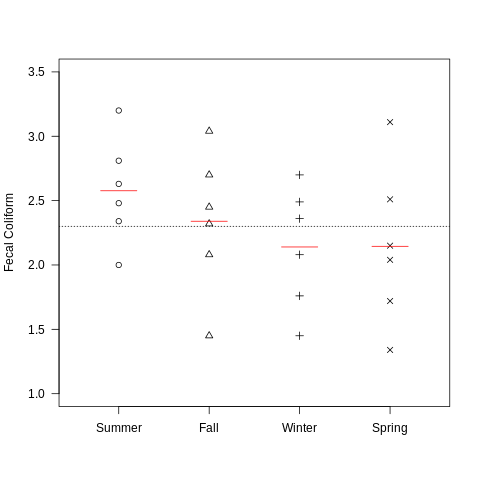

In [ ]:
%%R

plot( NULL, xlim= c(0.5,4.5), ylim=c(1, 3.5), axes=FALSE, xlab=NA,ylab="Fecal Coliform")
box()
axis(1, labels = names(dat)[-1], at=c(1,2,3,4))
axis(2, las=2, )
points(rep(1,nrow(dat)), dat$Summer, pch=1)
points(rep(2,nrow(dat)), dat$Fall, pch=2)
points(rep(3,nrow(dat)), dat$Winter, pch=3)
points(rep(4,nrow(dat)), dat$Spring, pch=4)


abline(h = mean(dat.long$Value), lty=3)


lines(c(.8,1.2), rep(mean(dat$Summer),2), col="red" )
lines(c(1.8,2.2), rep(mean(dat$Fall),2), col="red" )
lines(c(2.8,3.2), rep(mean(dat$Winter),2), col="red" )
lines(c(3.8,4.2), rep(mean(dat$Spring),2), col="red" )

In [ ]:
%%R

SSE.m <- sum( (dat.long$Value - mean(dat.long$Value))^2 ) 
SSE <- sum( (dat$Summer - mean(dat$Summer))^2 +
            (dat$Fall - mean(dat$Fall))^2 +
            (dat$Winter - mean(dat$Winter))^2 + 
            (dat$Spring - mean(dat$Spring))^2 )  
SSR <- SSE.m - SSE
MSR <- SSR / 3   # (p - 1) or 3 degrees of freedom
MSE <- SSE / 20  # (n - p) or 20 degrees of freedom
Fratio <- MSR/MSE
p.val  <- pf(Fratio, 3, 20,lower.tail=FALSE)

Исследование средних

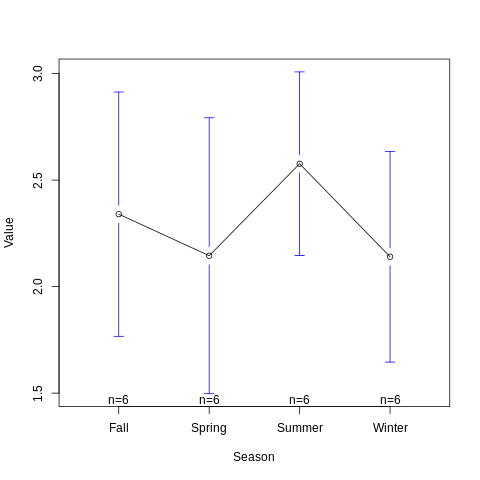

In [ ]:
%%R
plotmeans(Value ~ Season, dat.long)

In [ ]:
%%R
summary(aov(Value ~ Season, dat.long))

            Df Sum Sq Mean Sq F value Pr(>F)
Season       3  0.767  0.2555   0.956  0.433
Residuals   20  5.348  0.2674               


Парные сравнения

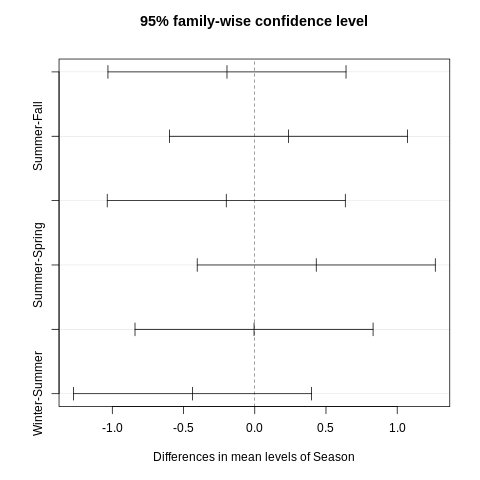

In [ ]:
%%R
TukeyHSD(aov(Value ~ Season, dat.long))

plot(TukeyHSD(aov(Value ~ Season, dat.long)))

Двухфакторный анализ

In [ ]:
%%R

set.seed(321)
datr.long <- data.frame( Year   = rep(rep(c(1971,1972,1973,1974,1975,1976),each=3),4),
                         Season = rep(c("Summer","Fall","Winter","Spring"),each=18),
                         Value  = rep(dat.long$Value,each=3) + rnorm(72,0,0.1))

datr.long

   Year Season    Value
1  1971 Summer 2.170490
2  1971 Summer 1.928796
3  1971 Summer 1.972202
4  1972 Summer 2.328035
5  1972 Summer 2.327604
6  1972 Summer 2.366818
7  1973 Summer 2.552684
8  1973 Summer 2.503314
9  1973 Summer 2.513911
10 1974 Summer 2.574809
11 1974 Summer 2.664770
12 1974 Summer 2.778459
13 1975 Summer 2.828833
14 1975 Summer 3.054326
15 1975 Summer 2.694656
16 1976 Summer 3.119533
17 1976 Summer 3.245607
18 1976 Summer 3.242033
19 1971   Fall 1.507758
20 1971   Fall 1.494636
21 1971   Fall 1.541726
22 1972   Fall 2.069294
23 1972   Fall 2.178834
24 1972   Fall 1.972776
25 1973   Fall 2.244198
26 1973   Fall 2.329500
27 1973   Fall 2.086907
28 1974   Fall 2.491752
29 1974   Fall 2.337967
30 1974   Fall 2.402532
31 1975   Fall 2.546959
32 1975   Fall 2.741571
33 1975   Fall 2.763420
34 1976   Fall 3.163085
35 1976   Fall 3.024544
36 1976   Fall 3.051454
37 1971 Winter 1.227374
38 1971 Winter 1.613579
39 1971 Winter 1.434068
40 1972 Winter 1.762827
41 1972 Winter 1

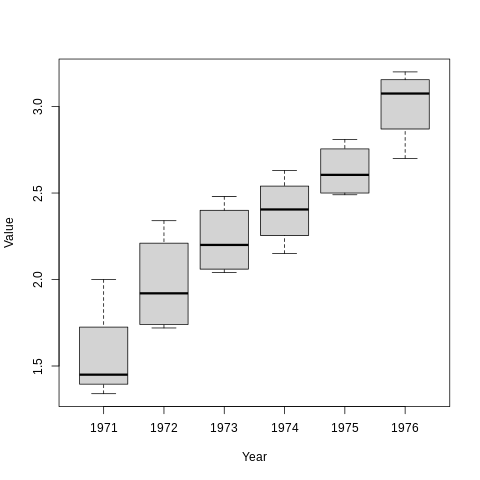

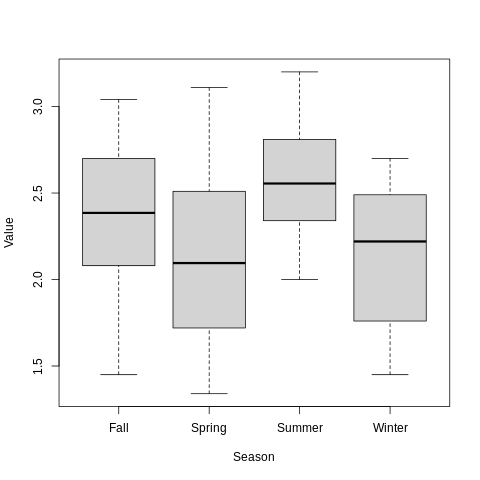

In [ ]:
%%R
boxplot(Value ~ Year, dat.long)
boxplot(Value ~ Season, dat.long)

In [ ]:
%%R

summary(aov(Value ~ Season + as.factor(Year), dat.long))

                Df Sum Sq Mean Sq F value   Pr(>F)    
Season           3  0.767  0.2555   17.57 3.58e-05 ***
as.factor(Year)  5  5.130  1.0260   70.56 6.98e-10 ***
Residuals       15  0.218  0.0145                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


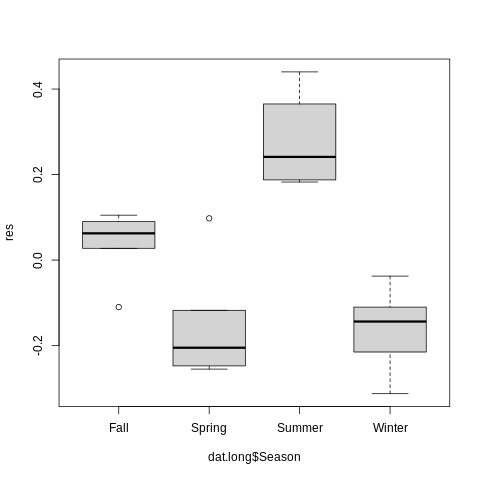

In [ ]:
%%R

res <- residuals(lm(Value ~ as.factor(Year), dat.long))
boxplot(res ~ dat.long$Season)

In [ ]:
%%R
coefficients(lm(Value ~ Season + as.factor(Year), dat.long))

        (Intercept)        SeasonSpring        SeasonSummer        SeasonWinter 
          1.5995833          -0.1950000           0.2366667          -0.2000000 
as.factor(Year)1972 as.factor(Year)1973 as.factor(Year)1974 as.factor(Year)1975 
          0.4150000           0.6700000           0.8375000           1.0675000 
as.factor(Year)1976 
          1.4525000 


$Coliform_{log} = 1.60 - 0.19 Spring +0.24 Summer -0.20 Winter + \\ 0.42 Year_{1972} +0.67 Year_{1973} +0.840 Year_{1974} + 1.07 Year_{1975} + 1.45 Year_{1976}$

Неаддитивные модели

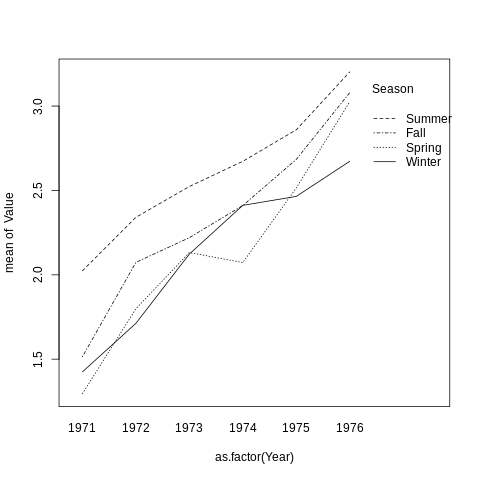

In [ ]:
%%R

with(datr.long, interaction.plot(as.factor(Year), Season, Value))

Ищем параллельные линии, если их нет, то тогда явно есть взаимодействие между факторами

In [ ]:
%%R

summary(aov(Value ~ Season + as.factor(Year) + as.factor(Year):Season, datr.long))

                       Df Sum Sq Mean Sq F value   Pr(>F)    
Season                  3  2.628  0.8759  86.951  < 2e-16 ***
as.factor(Year)         5 14.947  2.9895 296.772  < 2e-16 ***
Season:as.factor(Year) 15  0.632  0.0422   4.186 7.48e-05 ***
Residuals              48  0.484  0.0101                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
%%R

M1 <- aov(Value ~ Season + as.factor(Year), dat.long)
model.tables(M1)

Tables of effects

 Season 
Season
    Fall   Spring   Summer   Winter 
 0.03958 -0.15542  0.27625 -0.16042 

 as.factor(Year) 
as.factor(Year)
   1971    1972    1973    1974    1975    1976 
-0.7404 -0.3254 -0.0704  0.0971  0.3271  0.7121 
